In [1]:
import pandas as pd #数据分析
import numpy as np #科学计算
from pandas import Series,DataFrame

data_train = pd.read_csv("./train.csv")

data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
from sklearn.ensemble import RandomForestRegressor

### 使用 RandomForestClassifier 填补缺失的年龄属性
def set_missing_ages(df):

    # 把已有的数值型特征取出来丢进Random Forest Regressor中
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]

    # 乘客分成已知年龄和未知年龄两部分
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()

    # y即目标年龄
    y = known_age[:, 0]

    # X即特征属性值
    X = known_age[:, 1:]

    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)

    # 用得到的模型进行未知年龄结果预测
    predictedAges = rfr.predict(unknown_age[:, 1::])

    # 用得到的预测结果填补原缺失数据
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 

    return df, rfr

def set_Cabin_type(df):
    df.loc[ (df.Cabin.notnull()), 'Cabin' ] = "Yes"
    df.loc[ (df.Cabin.isnull()), 'Cabin' ] = "No"
    return df

data_train, rfr = set_missing_ages(data_train)
data_train = set_Cabin_type(data_train)
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,Yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,No,S
5,6,0,3,"Moran, Mr. James",male,23.838953,0,0,330877,8.4583,No,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,Yes,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,No,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,No,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,No,C


In [3]:
dummies_Cabin = pd.get_dummies(data_train['Cabin'], prefix= 'Cabin')

dummies_Embarked = pd.get_dummies(data_train['Embarked'], prefix= 'Embarked')

dummies_Sex = pd.get_dummies(data_train['Sex'], prefix= 'Sex')

dummies_Pclass = pd.get_dummies(data_train['Pclass'], prefix= 'Pclass')

df = pd.concat([data_train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1
5,6,0,23.838953,0,0,8.4583,1,0,0,1,0,0,1,0,0,1
6,7,0,54.000000,0,0,51.8625,0,1,0,0,1,0,1,1,0,0
7,8,0,2.000000,3,1,21.0750,1,0,0,0,1,0,1,0,0,1
8,9,1,27.000000,0,2,11.1333,1,0,0,0,1,1,0,0,0,1
9,10,1,14.000000,1,0,30.0708,1,0,1,0,0,1,0,0,1,0


In [4]:
#随机森林可以不用做归一化
'''
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
age_scale_param = scaler.fit(df['Age'].reshape(-1,1))
df['Age_scaled'] = scaler.fit_transform(df['Age'].reshape(-1,1), age_scale_param)
fare_scale_param = scaler.fit(df['Fare'].reshape(-1,1))
df['Fare_scaled'] = scaler.fit_transform(df['Fare'].reshape(-1,1), fare_scale_param)
df
'''

"\nimport sklearn.preprocessing as preprocessing\nscaler = preprocessing.StandardScaler()\nage_scale_param = scaler.fit(df['Age'].reshape(-1,1))\ndf['Age_scaled'] = scaler.fit_transform(df['Age'].reshape(-1,1), age_scale_param)\nfare_scale_param = scaler.fit(df['Fare'].reshape(-1,1))\ndf['Fare_scaled'] = scaler.fit_transform(df['Fare'].reshape(-1,1), fare_scale_param)\ndf\n"

In [5]:
# 用正则取出我们要的属性值
#train_df = df.filter(regex='Survived|Age|SibSp|Parch|Fare|Cabin_.*|Sex_.*|Pclass_.*')
train_df = df.filter(regex='Survived|Age|SibSp|Parch|Fare|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Survived      891 non-null int64
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Cabin_No      891 non-null uint8
Cabin_Yes     891 non-null uint8
Sex_female    891 non-null uint8
Sex_male      891 non-null uint8
Pclass_1      891 non-null uint8
Pclass_2      891 non-null uint8
Pclass_3      891 non-null uint8
dtypes: float64(2), int64(3), uint8(7)
memory usage: 41.0 KB
None


In [6]:
from sklearn import cross_validation

split_train, split_cv = cross_validation.train_test_split(train_df, test_size=0.3, random_state=0)

train_np = split_train.as_matrix()

# y即Survival结果
y = train_np[:, 0]

# X即特征属性值
X = train_np[:, 1:]

print(X.shape,y.shape)


train_np_v = split_cv.as_matrix()

# y即Survival结果
y_v = train_np_v[:, 0]

# X即特征属性值
X_v = train_np_v[:, 1:]

print(X_v.shape)
#print(split_cv.info())

(623, 11) (623,)
(268, 11)


D:\Anaconda2\envs\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation, metrics
from sklearn.metrics import classification_report

rf0 = RandomForestClassifier(oob_score=True, random_state=10)  
rf0.fit(X,y)  
print(rf0.oob_score_)
y_predprob = rf0.predict_proba(X)[:,1]  
print("AUC Score (Train): %f" % metrics.roc_auc_score(y,y_predprob) )
print(classification_report(y,rf0.predict(X) ) )


0.78330658105939
AUC Score (Train): 0.995808
             precision    recall  f1-score   support

        0.0       0.97      0.99      0.98       381
        1.0       0.98      0.95      0.96       242

avg / total       0.97      0.97      0.97       623



D:\Anaconda2\envs\python36\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda2\envs\python36\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [8]:
from sklearn.grid_search import GridSearchCV 


#首先对n_estimators进行网格搜索  
param_test1= {'n_estimators':list(range(10,201,10))}  
gsearch1= GridSearchCV(estimator = RandomForestClassifier(oob_score=True,random_state=10),  
                       param_grid =param_test1, scoring='roc_auc',cv=5)  
gsearch1.fit(X,y)  
gsearch1.grid_scores_,gsearch1.best_params_, gsearch1.best_score_ 

D:\Anaconda2\envs\python36\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
D:\Anaconda2\envs\python36\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda2\envs\python36\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\Anaconda2\envs\python36\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda2\en

([mean: 0.84740, std: 0.02272, params: {'n_estimators': 10},
  mean: 0.85811, std: 0.01971, params: {'n_estimators': 20},
  mean: 0.86493, std: 0.02164, params: {'n_estimators': 30},
  mean: 0.86516, std: 0.02275, params: {'n_estimators': 40},
  mean: 0.86783, std: 0.02061, params: {'n_estimators': 50},
  mean: 0.86595, std: 0.02138, params: {'n_estimators': 60},
  mean: 0.86446, std: 0.02128, params: {'n_estimators': 70},
  mean: 0.86424, std: 0.02147, params: {'n_estimators': 80},
  mean: 0.86327, std: 0.02200, params: {'n_estimators': 90},
  mean: 0.86156, std: 0.02250, params: {'n_estimators': 100},
  mean: 0.86235, std: 0.02378, params: {'n_estimators': 110},
  mean: 0.86183, std: 0.02438, params: {'n_estimators': 120},
  mean: 0.86055, std: 0.02416, params: {'n_estimators': 130},
  mean: 0.86099, std: 0.02397, params: {'n_estimators': 140},
  mean: 0.86090, std: 0.02383, params: {'n_estimators': 150},
  mean: 0.86101, std: 0.02500, params: {'n_estimators': 160},
  mean: 0.86087, 

In [9]:
best_n_estimators = gsearch1.best_params_["n_estimators"]

param_test2= {'max_depth':list(range(3,14,2)), 'min_samples_split':list(range(2,50,5))}  
gsearch2= GridSearchCV(estimator = RandomForestClassifier(n_estimators= best_n_estimators,oob_score=True,random_state=10),  
   param_grid = param_test2,scoring='roc_auc',iid=False, cv=5)  
gsearch2.fit(X,y)  
gsearch2.grid_scores_,gsearch2.best_params_, gsearch2.best_score_ 

([mean: 0.85283, std: 0.02347, params: {'max_depth': 3, 'min_samples_split': 2},
  mean: 0.85236, std: 0.02301, params: {'max_depth': 3, 'min_samples_split': 7},
  mean: 0.85234, std: 0.02372, params: {'max_depth': 3, 'min_samples_split': 12},
  mean: 0.85243, std: 0.02461, params: {'max_depth': 3, 'min_samples_split': 17},
  mean: 0.85174, std: 0.02369, params: {'max_depth': 3, 'min_samples_split': 22},
  mean: 0.85017, std: 0.02346, params: {'max_depth': 3, 'min_samples_split': 27},
  mean: 0.84973, std: 0.02169, params: {'max_depth': 3, 'min_samples_split': 32},
  mean: 0.85069, std: 0.02188, params: {'max_depth': 3, 'min_samples_split': 37},
  mean: 0.85099, std: 0.02152, params: {'max_depth': 3, 'min_samples_split': 42},
  mean: 0.84947, std: 0.02239, params: {'max_depth': 3, 'min_samples_split': 47},
  mean: 0.86449, std: 0.01784, params: {'max_depth': 5, 'min_samples_split': 2},
  mean: 0.85704, std: 0.01805, params: {'max_depth': 5, 'min_samples_split': 7},
  mean: 0.85493, std

In [10]:
best_max_depth = gsearch2.best_params_["max_depth"]
best_min_samples_split = gsearch2.best_params_["min_samples_split"]

rf1= RandomForestClassifier(n_estimators= best_n_estimators, 
                            max_depth=best_max_depth, 
                            min_samples_split=best_min_samples_split,
                            oob_score=True,random_state=10)  
rf1.fit(X,y)  
print(rf1.oob_score_)
y_predprob = rf1.predict_proba(X)[:,1]  
print("AUC Score (Train): %f" % metrics.roc_auc_score(y,y_predprob))
print(classification_report(y,rf1.predict(X) ))

0.8025682182985554
AUC Score (Train): 0.962241
             precision    recall  f1-score   support

        0.0       0.88      0.95      0.91       381
        1.0       0.91      0.79      0.85       242

avg / total       0.89      0.89      0.89       623



In [11]:
#再对内部节点再划分所需最小样本数min_samples_split和叶子节点最少样本数min_samples_leaf一起调参 
param_test3= {'min_samples_split':list(range(2,30,3)), 'min_samples_leaf':list(range(2,30,3))}  
gsearch3= GridSearchCV(estimator = RandomForestClassifier(n_estimators= best_n_estimators,
                                                          max_depth=best_max_depth,oob_score=True, random_state=10),  
   param_grid = param_test3,scoring='roc_auc',iid=False, cv=5)  
gsearch3.fit(X,y)  
gsearch3.grid_scores_,gsearch3.best_params_, gsearch3.best_score_ 


([mean: 0.86433, std: 0.03010, params: {'min_samples_leaf': 2, 'min_samples_split': 2},
  mean: 0.86777, std: 0.02825, params: {'min_samples_leaf': 2, 'min_samples_split': 5},
  mean: 0.87282, std: 0.02433, params: {'min_samples_leaf': 2, 'min_samples_split': 8},
  mean: 0.87070, std: 0.02856, params: {'min_samples_leaf': 2, 'min_samples_split': 11},
  mean: 0.86722, std: 0.03064, params: {'min_samples_leaf': 2, 'min_samples_split': 14},
  mean: 0.86800, std: 0.02962, params: {'min_samples_leaf': 2, 'min_samples_split': 17},
  mean: 0.86446, std: 0.03056, params: {'min_samples_leaf': 2, 'min_samples_split': 20},
  mean: 0.86188, std: 0.02970, params: {'min_samples_leaf': 2, 'min_samples_split': 23},
  mean: 0.86071, std: 0.02682, params: {'min_samples_leaf': 2, 'min_samples_split': 26},
  mean: 0.85974, std: 0.02881, params: {'min_samples_leaf': 2, 'min_samples_split': 29},
  mean: 0.86578, std: 0.02377, params: {'min_samples_leaf': 5, 'min_samples_split': 2},
  mean: 0.86578, std: 0.0

In [12]:
best_min_samples_leaf = gsearch3.best_params_["min_samples_leaf"]
best_min_samples_split = gsearch3.best_params_["min_samples_split"]

#最后我们再对最大特征数max_features做调参:  
param_test4= {'max_features':list(range(3,8,1))}  
gsearch4= GridSearchCV(estimator = RandomForestClassifier(n_estimators= best_n_estimators,
                                                          max_depth=best_max_depth, 
                                                          min_samples_split=best_min_samples_split,  
                                                          min_samples_leaf=best_min_samples_leaf ,
                                                          oob_score=True, random_state=10),  
   param_grid = param_test4,scoring='roc_auc',iid=False, cv=5)  
gsearch4.fit(X,y)  
gsearch4.grid_scores_,gsearch4.best_params_, gsearch4.best_score_  

([mean: 0.87282, std: 0.02433, params: {'max_features': 3},
  mean: 0.87548, std: 0.02421, params: {'max_features': 4},
  mean: 0.86845, std: 0.02743, params: {'max_features': 5},
  mean: 0.87099, std: 0.03094, params: {'max_features': 6},
  mean: 0.87173, std: 0.02762, params: {'max_features': 7}],
 {'max_features': 4},
 0.8754793407451839)

In [13]:
best_max_features = gsearch4.best_params_["max_features"]

#用我们搜索到的最佳参数，我们再看看最终的模型拟合：  
rf2= RandomForestClassifier(n_estimators= best_n_estimators, 
                            max_depth=best_max_depth, 
                            min_samples_split=best_min_samples_split,  
                            min_samples_leaf=best_min_samples_leaf,
                            max_features=best_max_features ,
                            oob_score=True, random_state=10)  
rf2.fit(X,y)  
print (rf2.oob_score_ )
y_predprob = rf2.predict_proba(X)[:,1]  
print("AUC Score (Train): %f" % metrics.roc_auc_score(y,y_predprob))
print(classification_report(y,rf2.predict(X) ))

0.8089887640449438
AUC Score (Train): 0.963710
             precision    recall  f1-score   support

        0.0       0.88      0.96      0.92       381
        1.0       0.92      0.80      0.85       242

avg / total       0.90      0.89      0.89       623



In [14]:
for rf in [rf0,rf1,rf2]:
    print('\noob_score_:',rf.oob_score_)
    y_predprob = rf.predict_proba(X_v)[:,1]  
    print("AUC Score (Train): %f" % metrics.roc_auc_score(y_v,y_predprob))
    print(classification_report(y_v,rf.predict(X_v) ))
    print(y_v[:20])
    print(rf.predict(X_v)[:20])


oob_score_: 0.78330658105939
AUC Score (Train): 0.868958
             precision    recall  f1-score   support

        0.0       0.83      0.89      0.86       168
        1.0       0.79      0.70      0.74       100

avg / total       0.82      0.82      0.81       268

[0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1.]
[0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1.]

oob_score_: 0.8025682182985554
AUC Score (Train): 0.883274
             precision    recall  f1-score   support

        0.0       0.85      0.89      0.87       168
        1.0       0.79      0.73      0.76       100

avg / total       0.83      0.83      0.83       268

[0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1.]
[0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1.]

oob_score_: 0.8089887640449438
AUC Score (Train): 0.890149
             precision    recall  f1-score   support

        0.0       0.86      0.90      0.88       168
        1.0       0.82      0.75     

In [15]:
train_np = train_df.as_matrix()

# y即Survival结果
y_all = train_np[:, 0]

# X即特征属性值
X_all = train_np[:, 1:]

print(X_all.shape)

(891, 11)


In [16]:
import copy

rf_final = copy.copy(rf2)

rf_final.fit(X_all,y_all)  
print(rf_final.oob_score_ )
y_predprob = rf_final.predict_proba(X_all)[:,1]  
print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_all,y_predprob))

print (rf_final)

names = train_df.columns.values.tolist()[1:]

for i,f in zip(rf_final.feature_importances_,names):
    print(f,i)

0.8237934904601572
AUC Score (Train): 0.966222
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=13, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=True, random_state=10, verbose=0, warm_start=False)
Age 0.20512338744365402
SibSp 0.03488578890362879
Parch 0.02538011537800796
Fare 0.16962684432592368
Cabin_No 0.03267105213212228
Cabin_Yes 0.024533835379255926
Sex_female 0.206300430741525
Sex_male 0.18377292292000738
Pclass_1 0.012511003276261527
Pclass_2 0.013314957331922183
Pclass_3 0.09187966216769121


In [17]:
data_test = pd.read_csv("./test.csv")
data_test.loc[ (data_test.Fare.isnull()), 'Fare' ] = 0
# 接着我们对test_data做和train_data中一致的特征变换
# 首先用同样的RandomForestRegressor模型填上丢失的年龄
tmp_df = data_test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
null_age = tmp_df[data_test.Age.isnull()].as_matrix()
# 根据特征属性X预测年龄并补上
X = null_age[:, 1:]
predictedAges = rfr.predict(X)
data_test.loc[ (data_test.Age.isnull()), 'Age' ] = predictedAges

data_test = set_Cabin_type(data_test)
dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(data_test['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix= 'Pclass')


df_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
#df_test['Age_scaled'] = scaler.fit_transform(df_test['Age'].reshape(-1,1), age_scale_param)
#df_test['Fare_scaled'] = scaler.fit_transform(df_test['Fare'].reshape(-1,1), fare_scale_param)
df_test

,PassengerId,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,892,34.500000,0,0,7.8292,1,0,0,1,0,0,1,0,0,1
1,893,47.000000,1,0,7.0000,1,0,0,0,1,1,0,0,0,1
2,894,62.000000,0,0,9.6875,1,0,0,1,0,0,1,0,1,0
3,895,27.000000,0,0,8.6625,1,0,0,0,1,0,1,0,0,1
4,896,22.000000,1,1,12.2875,1,0,0,0,1,1,0,0,0,1
5,897,14.000000,0,0,9.2250,1,0,0,0,1,0,1,0,0,1
6,898,30.000000,0,0,7.6292,1,0,0,1,0,1,0,0,0,1
7,899,26.000000,1,1,29.0000,1,0,0,0,1,0,1,0,1,0
8,900,18.000000,0,0,7.2292,1,0,1,0,0,1,0,0,0,1
9,901,21.000000,2,0,24.1500,1,0,0,0,1,0,1,0,0,1


In [21]:
#test = df_test.filter(regex='Age|SibSp|Parch|Fare|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
test = df_test.filter(regex='Age|SibSp|Parch|Fare|Cabin_.*|Sex_.*|Pclass_.*')
predictions = rf_final.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})
result.to_csv("./rfc_004.csv", index=False)

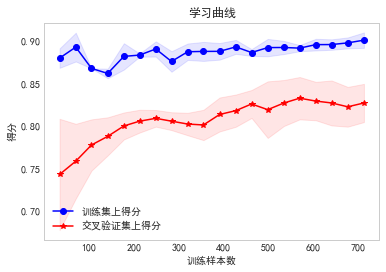

In [20]:
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
%matplotlib inline


from sklearn.learning_curve import learning_curve


# 用sklearn的learning_curve得到training_score和cv_score，使用matplotlib画出learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    if True:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"训练样本数")
        plt.ylabel(u"得分")
        plt.gca().invert_yaxis()
        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"训练集上得分")
        plt.plot(train_sizes, test_scores_mean, '*-', color="r", label=u"交叉验证集上得分")

        plt.legend(loc="best")

        plt.gca().invert_yaxis()
        plt.draw()
        plt.show()
        

    #midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    #diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    #return midpoint, diff


plot_learning_curve(rf_final, u"学习曲线", X_all, y_all,cv=5)